# Final Project - Reinforcements Learning 
Hello dear students,<br> this is the template notebook. Please click on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:
<br><br>
# Goodluck!

## Installs and Imports

In [ ]:
!pip install highway-env
!pip install git+https://github.com/DLR-RM/stable-baselines3
!pip install tensorboardx gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git 2> /dev/null
!git clone https://github.com/avivg7/highway-config.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 8.7 MB/s 
     |████████████████████████████████| 21.8 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-5ad2nft7
  Running command git clone -q https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-5ad2nft7
     |████████████████████████████████| 1.5 MB 7.9 MB/s 
  Created wheel for stable-baselines3: filename=stable_baselines3-1.5.1a8-py3-none-any.whl size=165288 sha256=7eea1cad7c77763ef37ae0820911174af4757a2b228d969d89643558d1e9aded
  Stored in directory: /tmp/pip-ephem-wheel-cache-u5tvt56t/wheels/2b/88/65/5d0cb266b061107af8c518096240bea8578e9843716f79e4da
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=16c855ef242d7d2efd18d032973928e43dee379a2f2ceb81bd270c3b632

In [ ]:
import gym
import highway_env
import sys
sys.path.insert(0, '/content/highway-env/scripts/')
from tqdm.notebook import trange
from utils import record_videos, show_videos
import numpy as np
from gym import logger as gymlogger
from gym.wrappers import Monitor
from gym.utils import seeding
from gym import error, spaces, utils
gymlogger.set_level(40) # error only
import io
import base64
import os
import random
import matplotlib.pyplot as plt
import math
import glob
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay
import pygame
import json
import ast
%load_ext tensorboard
%matplotlib inline

## Display utils
The cell below contains the video display configuration. No need to make changes here.

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

## EX1 - Highway-Env - Grayscale Image - Easy


iteration: 1, action: 0, reward: 0.7834133021310995, done: False
iteration: 2, action: 4, reward: 0.7237508248997796, done: False
iteration: 3, action: 3, reward: 0.7668330400459383, done: False
iteration: 4, action: 1, reward: 0.7853497007291951, done: False
iteration: 5, action: 1, reward: 0.793495692790564, done: False
iteration: 6, action: 1, reward: 0.7971096655820258, done: False
iteration: 7, action: 1, reward: 0.7987154371991156, done: False
iteration: 8, action: 1, reward: 0.7994290851187364, done: False
iteration: 9, action: 3, reward: 0.8738203342480061, done: False
iteration: 10, action: 0, reward: 0.9068831115254853, done: False
iteration: 11, action: 3, reward: 0.9215776791968233, done: False
iteration: 12, action: 4, reward: 0.8540345240874854, done: False
iteration: 13, action: 0, reward: 0.8240153440388825, done: False
iteration: 14, action: 0, reward: 0.8106734862395033, done: False
iteration: 15, action: 0, reward: 0.8047437716620015, done: False
iteration: 16, actio

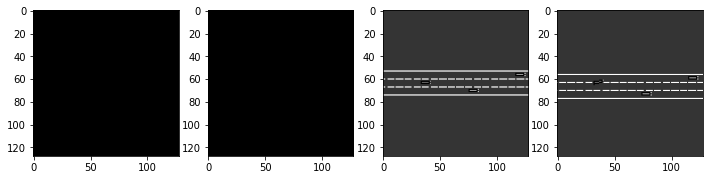

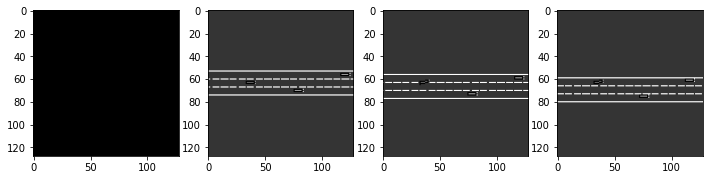

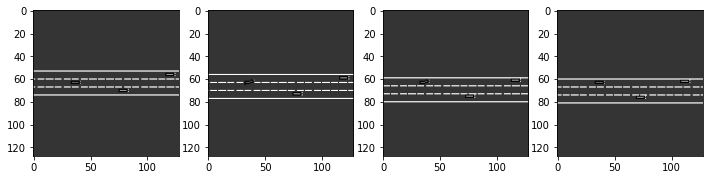

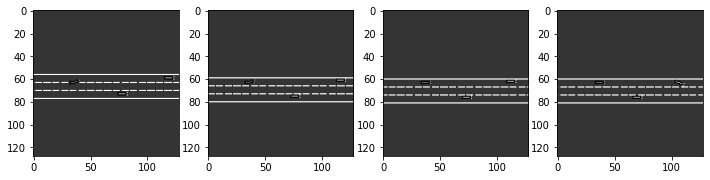

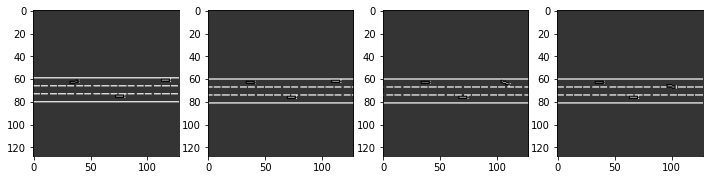

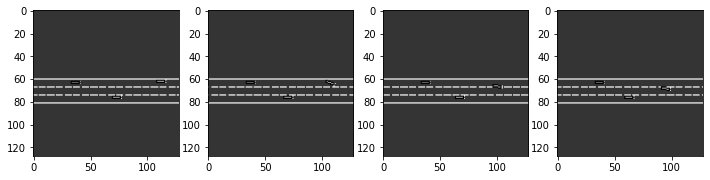

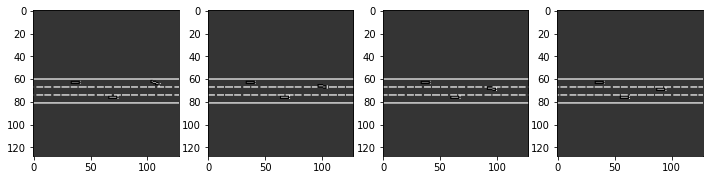

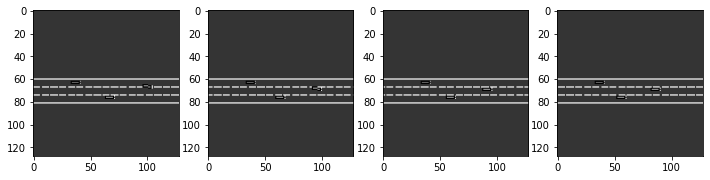

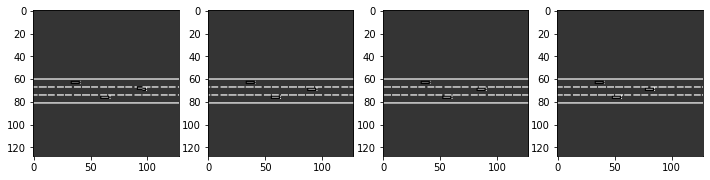

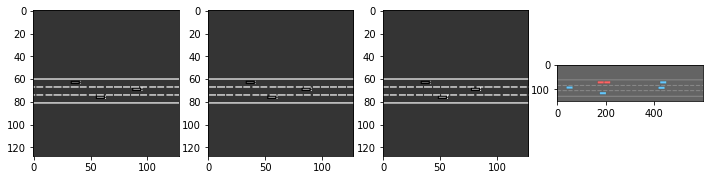

In [ ]:
#=============== DO NOT DELETE ===============
file = open('/content/highway-config/config_ex1.txt', 'r')
contents = file.read()
config1 = ast.literal_eval(contents)
file.close()
# ============================================

env = gym.make("highway-fast-v0")
env.configure(config1)

obs = env.reset()
for j in range(10):
    obs, _, _, _ = env.step(0)

    _, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
    

env = wrap_env(env)
env.reset()
done = False
iter = 0

while (iter < 10) or not done:
  if done:
    break
  iter +=1
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  print(f'iteration: {iter}, action: {action}, reward: {reward}, done: {done}')

In [ ]:
env.close()
show_video()

# EX2 - Highway-Env - Grayscale Image - Medium

iteration: 1, action: 2, reward: 0.8666666666666667, done: False
iteration: 2, action: 0, reward: 0.8367466354644327, done: False
iteration: 3, action: 2, reward: 0.8598895986248222, done: False
iteration: 4, action: 3, reward: 0.9396638307902622, done: False
iteration: 5, action: 4, reward: 0.8995238171153096, done: False
iteration: 6, action: 0, reward: 0.053780183297481056, done: True


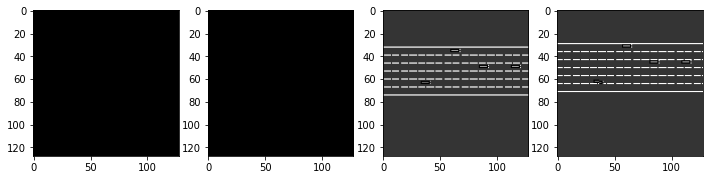

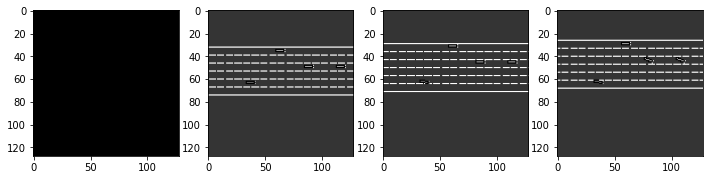

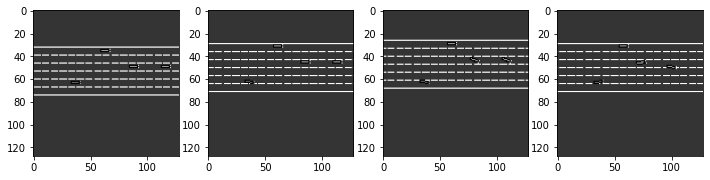

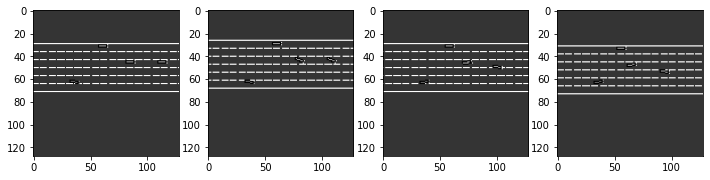

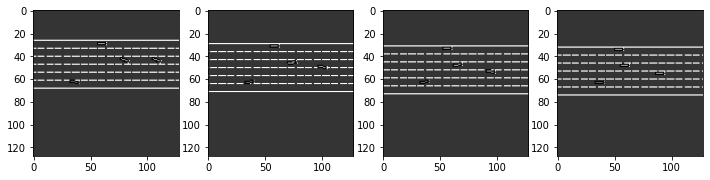

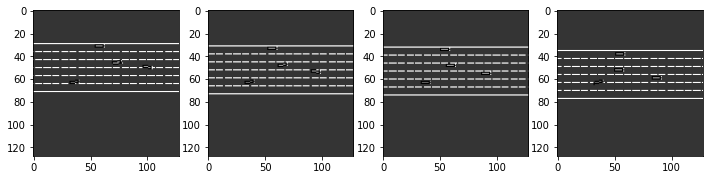

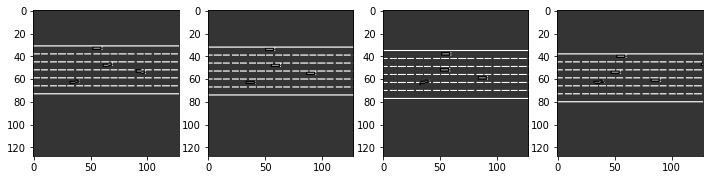

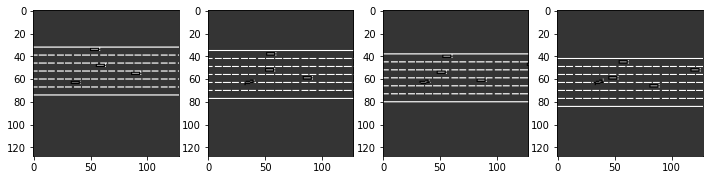

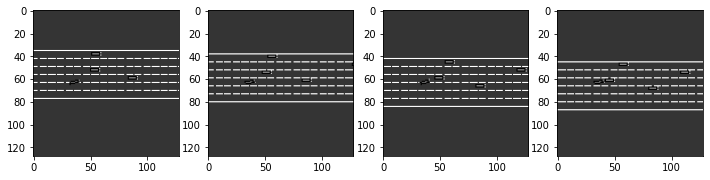

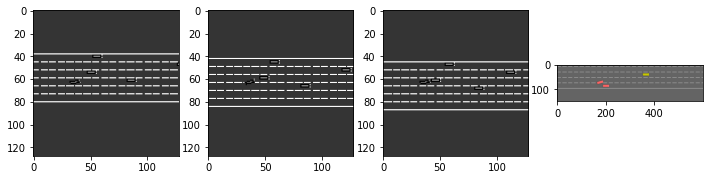

In [ ]:
#=============== DO NOT DELETE ===============
file = open('/content/highway-config/config_ex2.txt', 'r')
contents = file.read()
config2 = ast.literal_eval(contents)
file.close()
# ============================================

env = gym.make("highway-fast-v0")
env.configure(config2)

obs = env.reset()
for j in range(10):
    sam_act = env.action_space.sample()
    obs, _, _, _ = env.step(sam_act)

    _, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
    
env = wrap_env(env)
env.reset()
done = False
iter = 0
while (iter < 40) or not done:
  if done:
    break
  iter +=1
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  print(f'iteration: {iter}, action: {action}, reward: {reward}, done: {done}')

### Play video

In [ ]:
env.close()
show_video()

# Ex3 - Super Highway Agent

In [ ]:
#=============== DO NOT DELETE ===============
file = open('/content/highway-config/config_ex3.txt', 'r')
contents = file.read()
config3 = ast.literal_eval(contents)
file.close()
# ============================================

### Ex3 - Highway-Env

iteration: 1, action: 1, reward: 0.8333333333333334, done: False
iteration: 2, action: 3, reward: 0.9074074074074074, done: False
iteration: 3, action: 1, reward: 0.9403292181069959, done: False
iteration: 4, action: 1, reward: 0.9549611339734797, done: False
iteration: 5, action: 0, reward: 0.9132648573001529, done: False
iteration: 6, action: 4, reward: 0.8551161060879688, done: False
iteration: 7, action: 2, reward: 0.8457688737166137, done: False
iteration: 8, action: 1, reward: 0.8426727446051169, done: False
iteration: 9, action: 1, reward: 0.83817094561813, done: False
iteration: 10, action: 0, reward: 0.7865691375008614, done: False
iteration: 11, action: 4, reward: 0.7248117245541387, done: False
iteration: 12, action: 1, reward: 0.6931987522416739, done: False
iteration: 13, action: 0, reward: 0.6785402222742466, done: False
iteration: 14, action: 2, reward: 0.7000000000000001, done: False
iteration: 15, action: 4, reward: 0.7000000000000001, done: False
iteration: 16, action

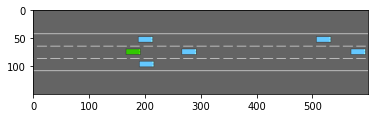

In [ ]:
env = gym.make("highway-fast-v0")
env.configure(config3) 

env = wrap_env(env)
env.reset()
done = False
iter = 0
while (iter < 10) or not done:
  if done:
    break
  iter +=1
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  print(f'iteration: {iter}, action: {action}, reward: {reward}, done: {done}')

### Play video

In [ ]:
env.close()
show_video()

### Ex3 - Merge-Env

iteration: 1, action: 3, reward: 1.0, done: False
iteration: 2, action: 2, reward: 0.9722222222222222, done: False
iteration: 3, action: 1, reward: 1.0, done: False
iteration: 4, action: 2, reward: 0.9722222222222222, done: False
iteration: 5, action: 3, reward: 1.0, done: False
iteration: 6, action: 2, reward: 0.9722222222222222, done: False
iteration: 7, action: 3, reward: 1.0, done: False
iteration: 8, action: 4, reward: 0.9444444444444444, done: False
iteration: 9, action: 4, reward: 0.888888888888889, done: False
iteration: 10, action: 0, reward: 0.790226684029707, done: False
iteration: 11, action: 4, reward: 0.792078535881559, done: False
iteration: 12, action: 1, reward: 0.7661526099556332, done: False
iteration: 13, action: 3, reward: 0.795782239585263, done: False
iteration: 14, action: 2, reward: 0.7976340914371148, done: False
iteration: 15, action: 1, reward: 0.7994859432889667, done: False
iteration: 16, action: 4, reward: 0.7180044618074852, done: False
iteration: 17, ac

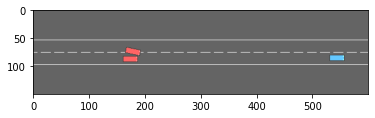

In [ ]:
env = gym.make("merge-v0")
env.configure(config3) 

env = wrap_env(env)
env.reset()
done = False
iter = 0

while (iter < 10) or not done:
  if done:
    break
  iter +=1
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  print(f'iteration: {iter}, action: {action}, reward: {reward}, done: {done}')

### Play video


In [ ]:
env.close()
show_video()

### Ex3 - Roundabout-Env

iteration: 1, action: 2, reward: 0.8800000000000001, done: False
iteration: 2, action: 1, reward: 0.9200000000000002, done: False
iteration: 3, action: 3, reward: 1.0, done: False
iteration: 4, action: 3, reward: 1.0, done: False
iteration: 5, action: 3, reward: 1.0, done: False
iteration: 6, action: 4, reward: 0.9200000000000002, done: False
iteration: 7, action: 1, reward: 0.9200000000000002, done: False
iteration: 8, action: 4, reward: 0.8400000000000001, done: False
iteration: 9, action: 2, reward: 0.8, done: False
iteration: 10, action: 3, reward: 0.9200000000000002, done: False
iteration: 11, action: 3, reward: 1.0, done: True


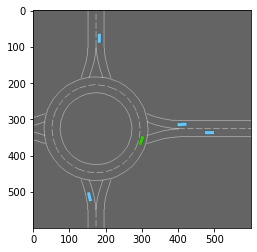

In [ ]:
env = gym.make("roundabout-v0")
env.configure(config3) 
env = wrap_env(env)
env.reset()
done = False
iter = 0
while (iter < 10) or not done:
  if done:
    break
  iter +=1
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  print(f'iteration: {iter}, action: {action}, reward: {reward}, done: {done}')

### Play video

In [ ]:
env.close()
show_video()